# Imports and Libraries

In [1]:
import pandas as pd
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker as mticks
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
# find all csv file under Data/Chicago folder
path = 'Data/Chicago'
csv_files = glob.glob(path + "/*.csv")
csv_files.sort()
print(csv_files)

['Data/Chicago\\Chicago-Crime_2001.csv', 'Data/Chicago\\Chicago-Crime_2002.csv', 'Data/Chicago\\Chicago-Crime_2003.csv', 'Data/Chicago\\Chicago-Crime_2004.csv', 'Data/Chicago\\Chicago-Crime_2005.csv', 'Data/Chicago\\Chicago-Crime_2006.csv', 'Data/Chicago\\Chicago-Crime_2007.csv', 'Data/Chicago\\Chicago-Crime_2008.csv', 'Data/Chicago\\Chicago-Crime_2009.csv', 'Data/Chicago\\Chicago-Crime_2010.csv', 'Data/Chicago\\Chicago-Crime_2011.csv', 'Data/Chicago\\Chicago-Crime_2012.csv', 'Data/Chicago\\Chicago-Crime_2013.csv', 'Data/Chicago\\Chicago-Crime_2014.csv', 'Data/Chicago\\Chicago-Crime_2015.csv', 'Data/Chicago\\Chicago-Crime_2016.csv', 'Data/Chicago\\Chicago-Crime_2017.csv', 'Data/Chicago\\Chicago-Crime_2018.csv', 'Data/Chicago\\Chicago-Crime_2019.csv', 'Data/Chicago\\Chicago-Crime_2020.csv', 'Data/Chicago\\Chicago-Crime_2021.csv', 'Data/Chicago\\Chicago-Crime_2022.csv', 'Data/Chicago\\Chicago-Crime_2023.csv']


In [3]:
# read and merge all csv_files
df = pd.concat([pd.read_csv(file) for file in csv_files ], ignore_index=True)
display(df.head(),df.tail())

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,9755072,1/1/2001 0:00,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
1,9755147,1/1/2001 0:00,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
2,11950657,1/1/2001 0:00,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,825,8.00,16.00,NaN,NaN
3,1311351,1/1/2001 0:00,BURGLARY,UNLAWFUL ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,925,9.00,NaN,NaN,NaN
4,11513580,1/1/2001 0:00,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,1222,12.00,27.00,NaN,NaN


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
1048570,13124495,6/29/2023 23:30,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1121,11.00,27.00,41.90,-87.71
1048571,13124229,6/29/2023 23:33,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1413,14.00,35.00,41.92,-87.71
1048572,13124350,6/29/2023 23:45,MOTOR VEHICLE THEFT,ATTEMPT - AUTOMOBILE,STREET,False,False,1132,11.00,24.00,41.87,-87.73
1048573,13124208,6/29/2023 23:50,OTHER OFFENSE,FALSE / STOLEN / ALTERED TRP,STREET,False,False,1723,17.00,45.00,41.95,-87.72
1048574,13124232,6/29/2023 23:57,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,633,6.00,8.00,41.73,-87.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1048575 non-null  int64  
 1   Date                  1048575 non-null  object 
 2   Primary Type          1048575 non-null  object 
 3   Description           1048575 non-null  object 
 4   Location Description  1042634 non-null  object 
 5   Arrest                1048575 non-null  bool   
 6   Domestic              1048575 non-null  bool   
 7   Beat                  1048575 non-null  int64  
 8   District              1048574 non-null  float64
 9   Ward                  1031879 non-null  float64
 10  Latitude              960711 non-null   float64
 11  Longitude             960711 non-null   float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 82.0+ MB


# Create two forms of data

In [5]:
# Original format: convert Date to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = False,
                           format = '%m/%d/%Y %H:%M')

In [6]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,9755072,2001-01-01,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
1,9755147,2001-01-01,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
2,11950657,2001-01-01,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,825,8.00,16.00,NaN,NaN
3,1311351,2001-01-01,BURGLARY,UNLAWFUL ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,925,9.00,NaN,NaN,NaN
4,11513580,2001-01-01,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,1222,12.00,27.00,NaN,NaN


In [7]:
# set the datetime column as the index
df = df.set_index('Date')
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,9755072,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
2001-01-01,9755147,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN
2001-01-01,11950657,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,825,8.00,16.00,NaN,NaN
2001-01-01,1311351,BURGLARY,UNLAWFUL ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,925,9.00,NaN,NaN,NaN
2001-01-01,11513580,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,1222,12.00,27.00,NaN,NaN


In [8]:
df['District'].value_counts()

11.00    73001
8.00     66495
6.00     61161
4.00     58254
25.00    56449
7.00     56217
18.00    54336
12.00    53779
1.00     53316
3.00     49760
2.00     47968
10.00    47682
9.00     47278
19.00    47250
5.00     46721
15.00    41720
14.00    38184
16.00    36233
22.00    33773
24.00    30253
17.00    30231
20.00    18482
31.00       31
Name: District, dtype: int64

In [9]:
# A resampled/converted crime counts version 
# alternate code:
resampled_df = df.copy()
# add 'Count' column with 1 for each row
resampled_df['Count'] = 1
# resample and count with .sum()
resampled_df = resampled_df.resample('D').sum(numeric_only = True)

# check
resampled_df.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,
2001-01-01,845352298,13,19,132931,"1,259.00","1,855.00","1,004.10","-2,103.85",113
2001-01-02,21086674,6,2,21924,174.00,0.00,502.05,"-1,051.65",16
2001-01-03,27052955,4,0,23520,211.00,0.00,711.32,"-1,490.20",20
2001-01-04,17159687,4,1,15644,153.00,0.00,543.97,"-1,139.68",13
2001-01-05,25116704,2,4,17592,167.00,0.00,543.72,"-1,139.14",19


# Comparing Police Districts:

Which district has the most crimes? Which has the least?

In [10]:
# create a barplot function
def plot_bar(df, y_column, pale, yticks, ylab):
  fig, axes = plt.subplots(nrows=1, figsize=(15,5), sharex=True)
  g = sns.countplot(data=df, y=y_column, 
              palette=pale, order = df[y_column].value_counts().index)
  g.set(yticklabels=yticks);
  g.set_xlabel('Counts');
  g.set_ylabel(ylab);
  g.set_title(f'Count of Each {ylab}', fontsize=14, weight = 'bold');

  total = float(len(df))
  for p in g.patches:
      count = round(p.get_width())
      y = p.get_y() + p.get_height()-0.3
      x = p.get_width()
      g.annotate(count, (x, y),ha='left')
        
  FOLDER = "PNG/"
  isExist = os.path.exists(FOLDER)
    
  if isExist == False:  
      os.makedirs(FOLDER, exist_ok=True)
        
  plt.savefig(f'{FOLDER}/{y_column}_barplot.png',bbox_inches='tight')

  return fig,g


In [11]:
# number of crimes per district
count_by_dis = df['District'].value_counts().rename_axis('District').to_frame('Count')
count_by_dis = count_by_dis.reset_index()
display(count_by_dis.head(1),count_by_dis.tail(1))

,District,Count
0,11.00,73001


,District,Count
22,31.00,31


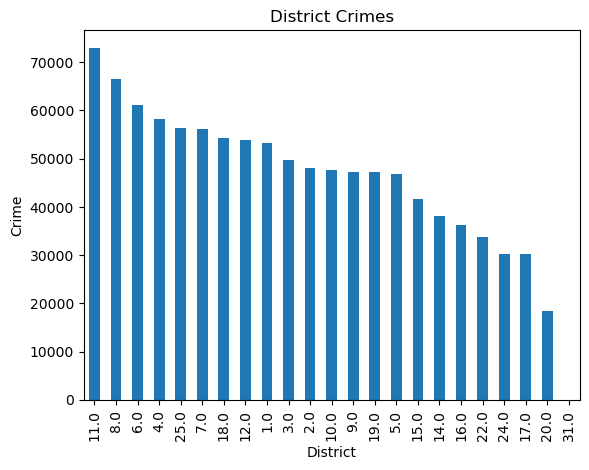

In [12]:
District = df['District'].value_counts()

ax = District.plot(kind = 'bar', title = 'District Crimes',)
ax.set (xlabel = 'District', ylabel = 'Crime')

plt.savefig('District_Crime.png')

# Results: 

The district with the most crimes is District 11 with 73, 001 crimes committed.  The district with the least amount of crimes committed is District 31 with 31 crimes.

#  Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [13]:
df['year'] = df.index.year
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year
Date,,,,,,,,,,,,
2001-01-01,9755072,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN,2001
2001-01-01,9755147,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN,2001
2001-01-01,11950657,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,825,8.00,16.00,NaN,NaN,2001
2001-01-01,1311351,BURGLARY,UNLAWFUL ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,925,9.00,NaN,NaN,NaN,2001
2001-01-01,11513580,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,1222,12.00,27.00,NaN,NaN,2001


In [14]:
yearly_crime = df.resample('Y').size()

yearly_crime

Date
2001-12-31      9128
2002-12-31     20800
2003-12-31      9405
2004-12-31      7710
2005-12-31      9057
2006-12-31      7912
2007-12-31      6713
2008-12-31     12282
2009-12-31     11501
2010-12-31      5214
2011-12-31      4991
2012-12-31      5041
2013-12-31      5043
2014-12-31      6274
2015-12-31    218052
2016-12-31    268970
2017-12-31    268358
2018-12-31    142263
2019-12-31      5087
2020-12-31      6032
2021-12-31      8028
2022-12-31      8066
2023-12-31      2648
Freq: A-DEC, dtype: int64

# Visualization

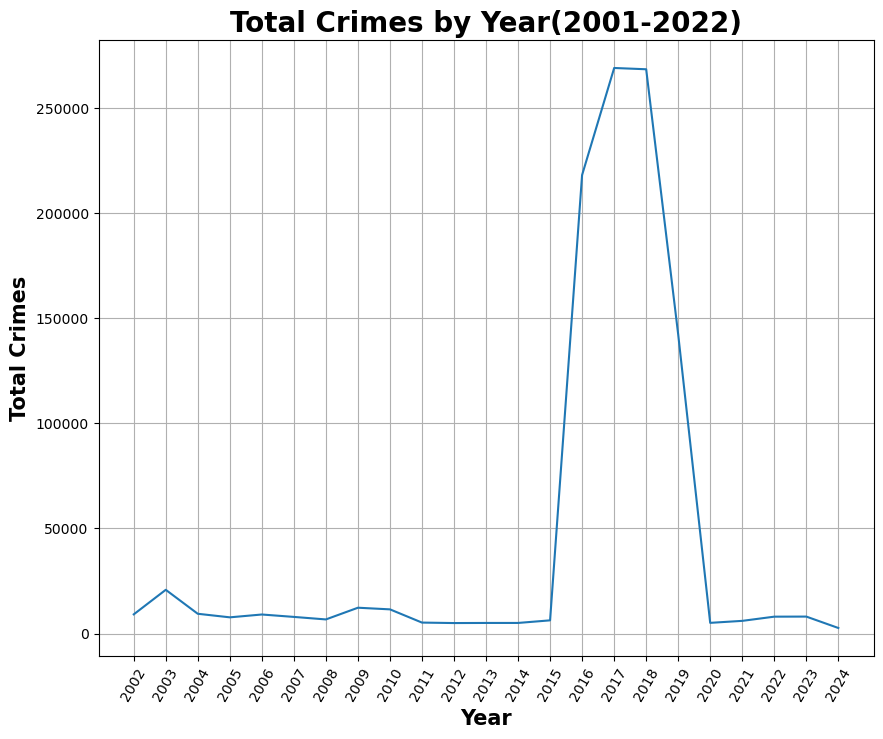

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.lineplot(x = yearly_crime.index, y = yearly_crime.values)


major_ticks_loc = mdates.YearLocator(1)
major_ticks_format = mdates.DateFormatter('%Y')
x_years = pd.date_range(start = '2002', end = '2024', freq = 'AS')
plt.xticks(x_years, [year.year for year in x_years])

plt.xticks(rotation = 60)
ax.grid()

ax.set_title('Total Crimes by Year(2001-2022)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

# Results:
Between the years of 2002 to 2015, the number of crimes stay relatively low.  There is a slight increase in 2003, then it lowers until 2008.  It increases until 2009, then decreases in 2011.  In 2015, it spikes.  2017 sees the most increase, then it decreases again in 2020.

#  Comparing Months:

What months have the most crime? What months have the least?

In [48]:
df['month'] = df.index.month
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,year,month
Date,,,,,,,,,,,,,
2001-01-01,9755072,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN,2001,1
2001-01-01,9755147,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.00,24.00,NaN,NaN,2001,1
2001-01-01,11950657,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,825,8.00,16.00,NaN,NaN,2001,1
2001-01-01,1311351,BURGLARY,UNLAWFUL ENTRY,FACTORY/MANUFACTURING BUILDING,False,False,925,9.00,NaN,NaN,NaN,2001,1
2001-01-01,11513580,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,1222,12.00,27.00,NaN,NaN,2001,1


In [49]:
monthly_crime = df.resample('M').size()

monthly_crime

Date
2001-01-31     751
2001-02-28     596
2001-03-31     670
2001-04-30     711
2001-05-31     788
              ... 
2023-02-28     278
2023-03-31     299
2023-04-30     322
2023-05-31     354
2023-06-30    1065
Freq: M, Length: 270, dtype: int64

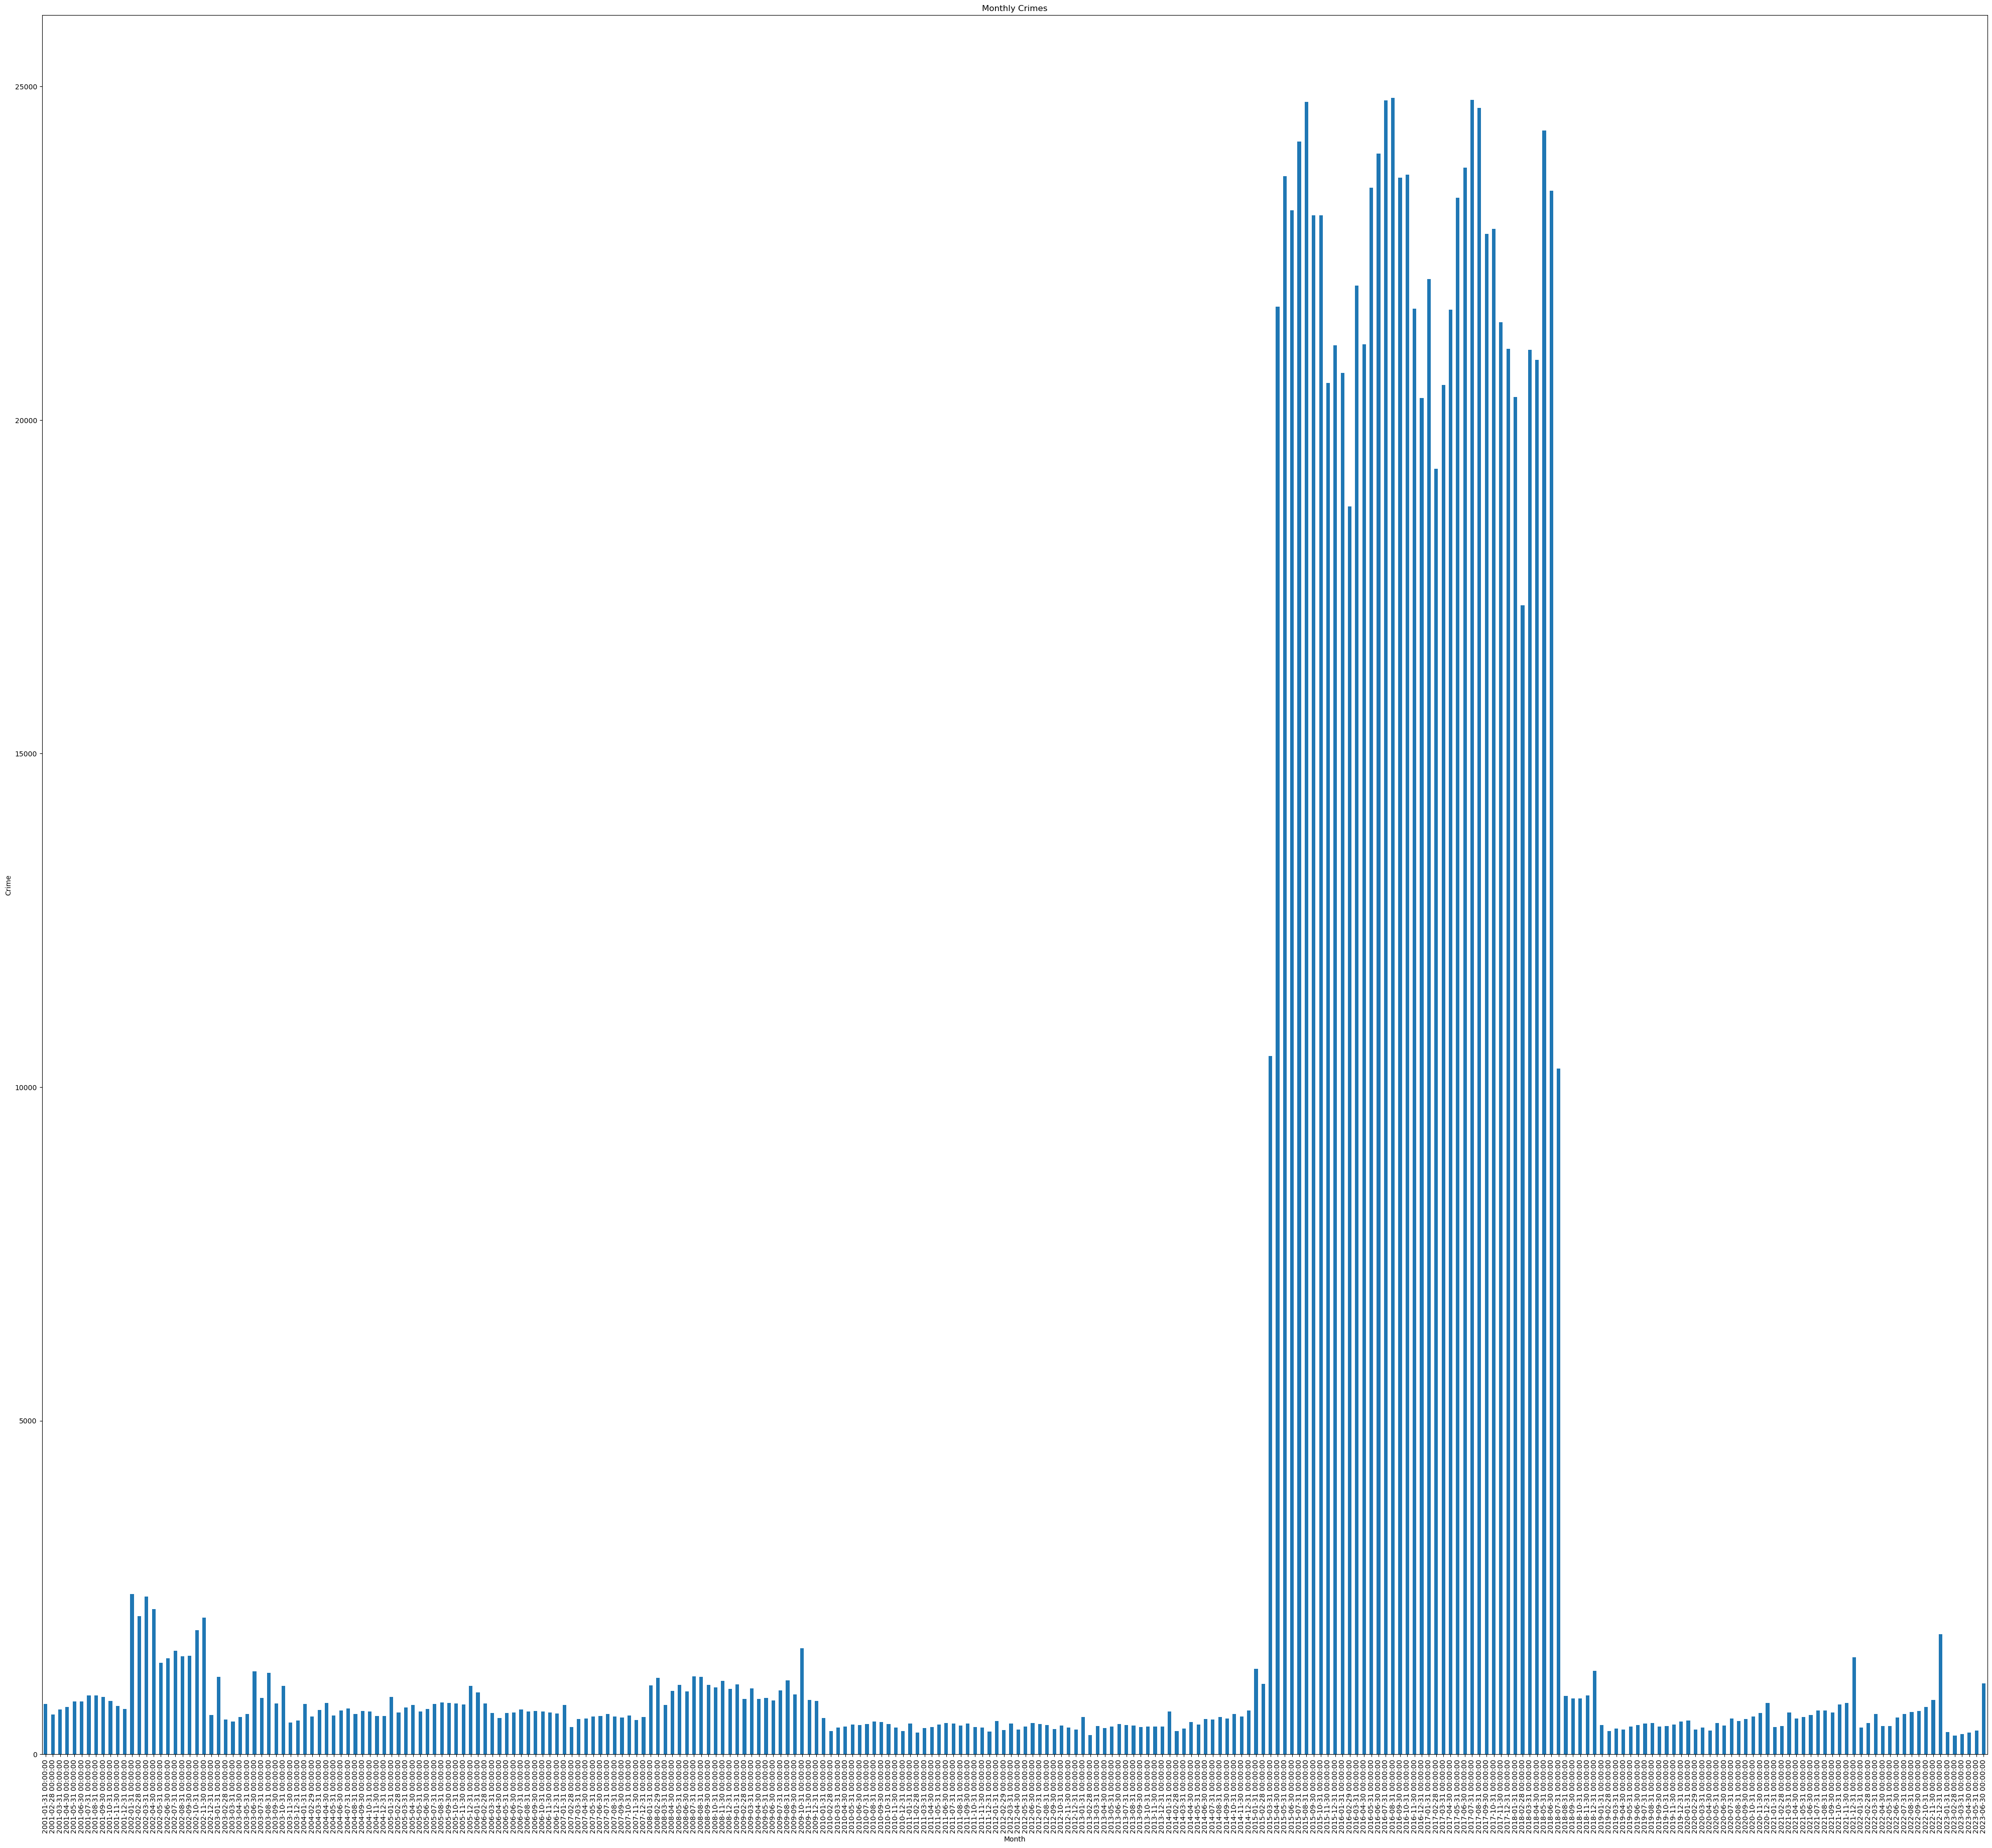

In [56]:
ax = monthly_crime.plot(kind = 'bar', title = 'Monthly Crimes',figsize = (50,45))
ax.set (xlabel = 'Month', ylabel = 'Crime')

plt.savefig('Monthly_Crime.png')

In [55]:
#fig, ax = plt.subplots(figsize = (10, 8))
#ax = sns.lineplot(x = monthly_crime.index, y = monthly_crime.values)


#major_ticks_loc = mdates.MonthLocator(1)
#major_ticks_format = mdates.DateFormatter('%Y')
#x_months = pd.date_range(start = '01-01-2001', end = '12-31-2022', freq = 'AS')
#plt.xticks(x_months, [month.month for month in x_months])

#plt.xticks(rotation = 60)
#ax.grid()

#ax.set_title('Total Crimes by Month', fontsize = 20, weight = 'bold')
#ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
#ax.set_xlabel('Month', fontsize = 15, weight = 'bold');